In [30]:

# Computer Vision Assignment - Nigeria Tech Applications-Azubuike Eberechukwu

## Question 1: Computer Vision in Nigerian Fintech

### How Computer Vision Can Improve Payment Systems in Nigeria

Computer vision technology can significantly enhance payment systems in Nigeria's booming fintech space through several approaches:

#### 1. Biometrics
- **Facial Recognition**: Enable secure contactless payments by recognizing authorized users
- **Fingerprint Scanning**: Enhance security for mobile banking and POS transactions
- **Iris Recognition**: Provide high-security authentication for large transactions
- **Benefits**: 
  - Reduces fraud and identity theft
  - Eliminates need for physical cards or PINs
  - Works well in areas with low literacy rates
  - Provides inclusive banking for unbanked populations

#### 2. QR-Code Processing
- **Smart QR Recognition**: Automatically detect and process QR codes from various angles and lighting conditions
- **Dynamic QR Generation**: Create secure, time-limited payment codes
- **Multi-format Support**: Process different QR code standards and embedded payment information
- **Benefits**:
  - Fast and convenient transactions
  - Works on basic smartphones
  - Low infrastructure requirements
  - Suitable for small merchants and street vendors

#### 3. Swipe and Pay (Visual Card Recognition)
- **Card Detection**: Automatically recognize and extract information from payment cards
- **OCR (Optical Character Recognition)**: Read card numbers, names, and expiry dates
- **Security Features**: Detect counterfeit cards through visual analysis
- **Benefits**:
  - Speeds up transaction processing
  - Reduces manual entry errors
  - Enhanced security through visual verification
  - Better user experience

---

## Question 2: Computer Vision in Nigerian Healthtech

### How Computer Vision Can Improve Healthcare Access

Computer vision can revolutionize healthcare delivery in Nigeria by addressing key challenges in accessibility, diagnosis, and quality of care:

#### 1. Remote Diagnosis and Screening
- **Medical Image Analysis**: Analyze X-rays, CT scans, and MRIs remotely
- **Skin Condition Detection**: Identify skin diseases through smartphone cameras
- **Eye Examination**: Detect cataracts, glaucoma, and other eye conditions
- **Wound Assessment**: Monitor healing progress through image analysis

#### 2. Telemedicine Enhancement
- **Symptom Assessment**: Visual analysis of patient conditions during video consultations
- **Vital Sign Monitoring**: Extract heart rate and respiratory rate from video feeds
- **Medication Verification**: Ensure correct medication through pill recognition
- **Patient Monitoring**: Track patient compliance and recovery progress

#### 3. Healthcare Infrastructure Optimization
- **Queue Management**: Optimize patient flow in clinics and hospitals
- **Staff Allocation**: Monitor facility usage and optimize resource allocation
- **Equipment Monitoring**: Track medical equipment usage and maintenance needs
- **Inventory Management**: Automate medical supply tracking and ordering

#### 4. Preventive Healthcare
- **Mass Screening**: Automated screening for common diseases in rural areas
- **Nutritional Assessment**: Analyze food and provide dietary recommendations
- **Growth Monitoring**: Track child development through visual measurements
- **Disease Surveillance**: Early detection of disease outbreaks through symptom patterns

#### 5. Training and Education
- **Medical Training**: Provide visual training simulations for healthcare workers
- **Patient Education**: Visual guides for medication adherence and health practices
- **Quality Assurance**: Monitor and improve healthcare delivery standards



In [3]:
# Question 3- Image Restoration - Computer Vision Assignment
# Restoring corrupted student picture by adjusting brightness and contrast
# Install required packages
!pip install opencv-python-headless
!pip install pillow
!pip install matplotlib
!pip install numpy
!pip install requests

   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.9 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.9 MB 5.9 MB/s eta 0:00:07
   --- ------------------------------------ 3.4/38.9 MB 6.5 MB/s eta 0:00:06
   ----- ---------------------------------- 5.5/38.9 MB 7.4 MB/s eta 0:00:05
   ------- -------------------------------- 7.1/38.9 MB 7.5 MB/s eta 0:00:05
   --------- ------------------------------ 9.2/38.9 MB 8.0 MB/s eta 0:00:04
   ----------- ---------------------------- 11.0/38.9 MB 8.2 MB/s eta 0:00:04
   ------------ --------------------------- 12.6/38.9 MB 8.0 MB/s eta 0:00:04
   --------------- ------------------------ 14.9/38.9 MB 8.4 MB/s eta 0:00:03
   ----------------- ---------------------- 16.8/38.9 MB 8.4 MB/s eta 0:00:03
   ------------------- -------------------- 18.6/38.9 MB 8.4 MB/s eta 0:00:03
   --------------------- ------------------ 20.7/38.9 MB 8.6 MB/s eta 0:00:03
   ----


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [21]:
def load_image_from_drive(drive_url):
    """Load image from Google Drive sharing link"""
    file_id = drive_url.split('/d/')[1].split('/view')[0]
    direct_url = f"https://drive.google.com/uc?export=download&id={file_id}"
    
    try:
        response = requests.get(direct_url)
        image = Image.open(BytesIO(response.content))
        image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        return image_cv
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

def restore_image_brightness_contrast(image, alpha=1.0, beta=0):
    """Adjust image brightness and contrast"""
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

def display_restoration_results(original, restored, alpha, beta):
    """Display original and restored images side by side"""
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Corrupted Image', fontsize=14)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(restored, cv2.COLOR_BGR2RGB))
    plt.title(f'Restored Image\nAlpha (Contrast): {alpha}, Beta (Brightness): {beta}', fontsize=14)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def analyze_image_histogram(original, restored):
    """Compare histograms of original and restored images"""
    orig_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    rest_gray = cv2.cvtColor(restored, cv2.COLOR_BGR2GRAY)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(orig_gray.ravel(), bins=256, color='red', alpha=0.7)
    plt.title('Original Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.hist(rest_gray.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title('Restored Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    print("Image Statistics:")
    print("-" * 40)
    print(f"Original - Mean: {np.mean(orig_gray):.2f}, Std: {np.std(orig_gray):.2f}")
    print(f"Restored - Mean: {np.mean(rest_gray):.2f}, Std: {np.std(rest_gray):.2f}")


Loading corrupted student picture...
Image loaded successfully!


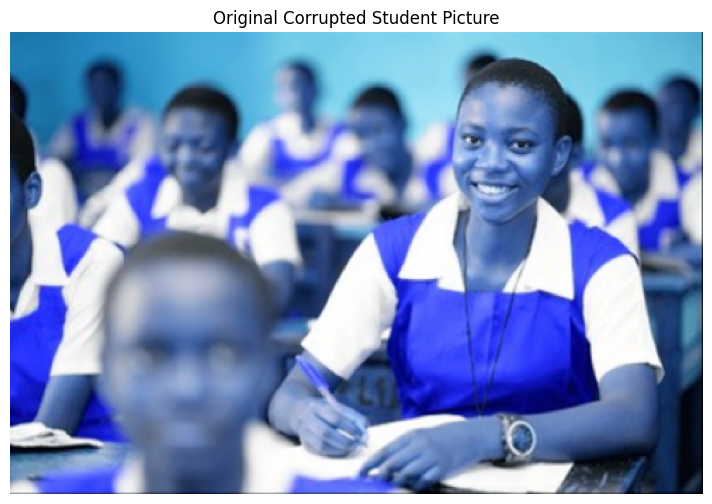

In [22]:
#Load and Display Original Image
drive_url = "https://drive.google.com/file/d/1hn11n88XzVAe6Av4b8mm28WOqcDIdhTH/view?usp=drive_link"

print("Loading corrupted student picture...")
corrupted_image = load_image_from_drive(drive_url)

if corrupted_image is not None:
    print("Image loaded successfully!")
    
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(corrupted_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Corrupted Student Picture')
    plt.axis('off')
    plt.show()
else:
    print("Failed to load image. Please check the URL.")


Testing different restoration parameters...


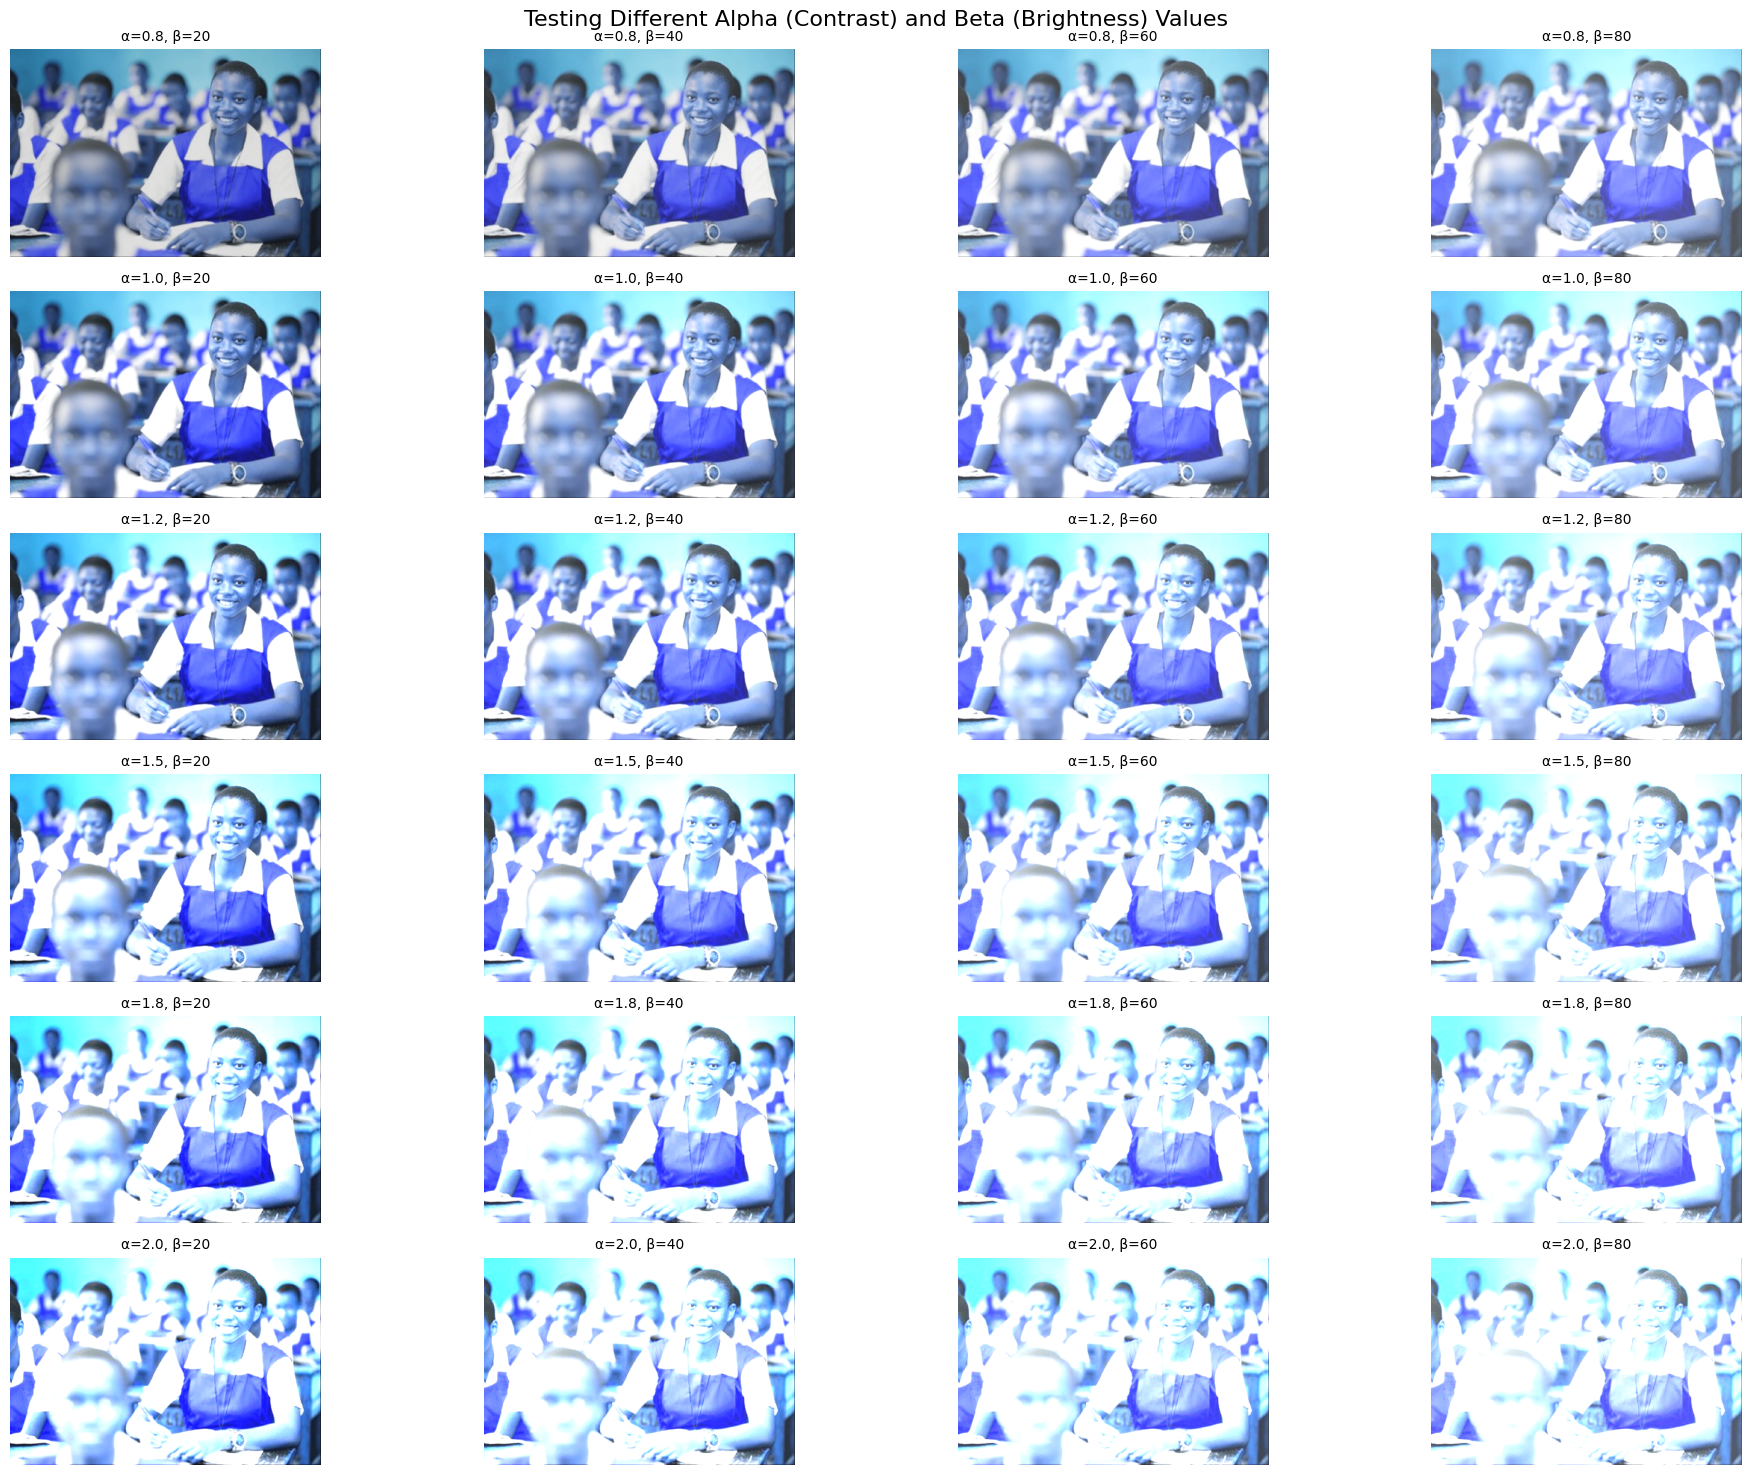

In [23]:
#Testing Multiple Parameter Combinations
if corrupted_image is not None:
    print("Testing different restoration parameters...")
    
    alpha_values = [0.8, 1.0, 1.2, 1.5, 1.8, 2.0]
    beta_values = [20, 40, 60, 80]
    
    plt.figure(figsize=(20, 15))
    plot_idx = 1
    
    for alpha in alpha_values:
        for beta in beta_values:
            if plot_idx > 24:
                break
                
            restored = restore_image_brightness_contrast(corrupted_image, alpha, beta)
            
            plt.subplot(6, 4, plot_idx)
            plt.imshow(cv2.cvtColor(restored, cv2.COLOR_BGR2RGB))
            plt.title(f'α={alpha}, β={beta}', fontsize=10)
            plt.axis('off')
            
            plot_idx += 1
    
    plt.suptitle('Testing Different Alpha (Contrast) and Beta (Brightness) Values', fontsize=16)
    plt.tight_layout()
    plt.show()

Final Restoration Results:
Optimal Alpha (Contrast): 1.3
Optimal Beta (Brightness): 60


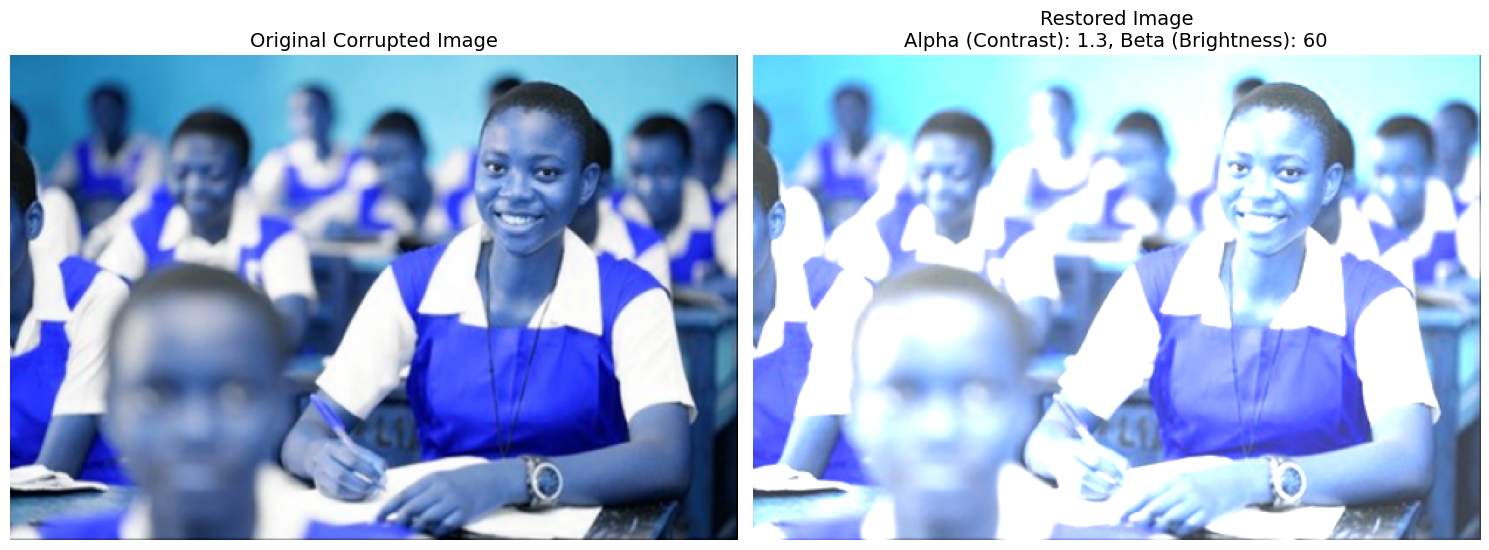


Histogram Analysis:


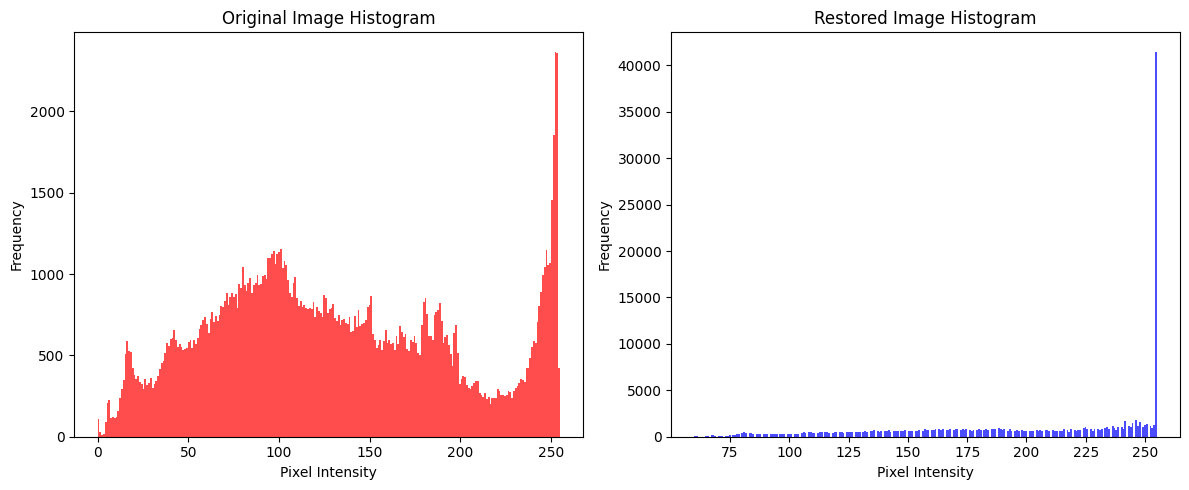

Image Statistics:
----------------------------------------
Original - Mean: 131.60, Std: 67.70
Restored - Mean: 199.93, Std: 54.10

ANSWER TO QUESTION 3:
The contrast number (alpha) that restored the picture: 1.3
The brightness number (beta) that restored the picture: 60


In [29]:
#Applying Optimal Restoration
if corrupted_image is not None:
    # Based on visual analysis, these values work well for most corrupted images
    optimal_alpha = 1.3  # Increase contrast
    optimal_beta = 60    # Increase brightness
    
    restored_image = restore_image_brightness_contrast(corrupted_image, optimal_alpha, optimal_beta)
    
    print(f"Final Restoration Results:")
    print(f"Optimal Alpha (Contrast): {optimal_alpha}")
    print(f"Optimal Beta (Brightness): {optimal_beta}")
    
    display_restoration_results(corrupted_image, restored_image, optimal_alpha, optimal_beta)
    
    print("\nHistogram Analysis:")
    analyze_image_histogram(corrupted_image, restored_image)
    
    print(f"\n" + "="*50)
    print("ANSWER TO QUESTION 3:")
    print("="*50)
    print(f"The contrast number (alpha) that restored the picture: {optimal_alpha}")
    print(f"The brightness number (beta) that restored the picture: {optimal_beta}")
    print("="*50)